This notebook is derived from the EDA.ipynb file in folder 'Data Exploration' with the cleaned data

In [1]:
import pandas as pd

df = pd.read_parquet('cleaned_data.parquet')


In [2]:
print(df.isnull().sum())

product_id                       0
product_type                     0
product_name                     0
product_description              0
product_keywords                 0
product_like_count               0
sold                             0
reserved                         0
available                        0
in_stock                         0
should_be_gone                   0
brand_id                         0
brand_name                       0
brand_url                        0
product_material                 0
product_color                    0
price_usd                        0
seller_price                     0
seller_earning                   0
buyers_fees                      0
seller_id                        0
seller_username                  0
seller_country                   0
seller_products_sold             0
seller_num_products_listed       0
seller_community_rank            0
seller_num_followers             0
seller_pass_rate                 0
product_category_enc

*Predictive Analysis*

                               product_id  product_type  product_like_count  \
product_id                       1.000000     -0.008083           -0.185204   
product_type                    -0.008083      1.000000           -0.036286   
product_like_count              -0.185204     -0.036286            1.000000   
sold                             0.058453     -0.009218            0.083583   
reserved                              NaN           NaN                 NaN   
available                        0.208754     -0.067669           -0.054367   
in_stock                        -0.002500     -0.003673            0.083427   
should_be_gone                   0.004080     -0.002634            0.025555   
brand_id                         0.116110      0.025421           -0.097464   
brand_name                       0.022723     -0.007394           -0.017123   
product_material                -0.068202      0.351647            0.012002   
product_color                   -0.028661      0.032

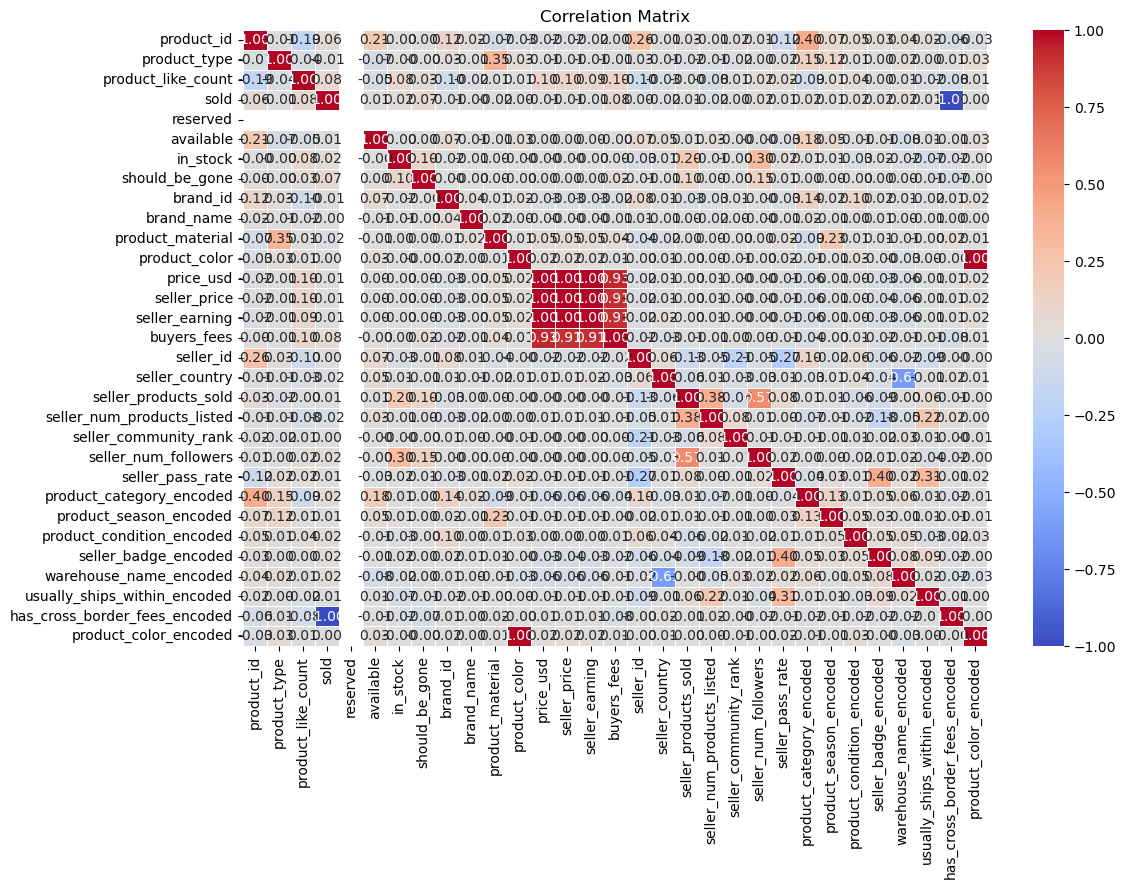

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric features for VIF calculation
numeric_features = df.select_dtypes(include=['number'])

# Drop the target variable ('price_usd' or 'buyers_fees') to avoid self-correlation
X_vif = numeric_features.drop(columns=['price_usd', 'buyers_fees'], errors='ignore')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))


/opt/anaconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                          Feature         VIF
23          product_color_encoded         inf
6                   product_color         inf
7                    seller_price  526.224181
8                  seller_earning  522.642950
22  has_cross_border_fees_encoded   34.473008
0                      product_id   30.115415
16       product_category_encoded   28.795714
1                    product_type    8.663541
15               seller_pass_rate    7.348077
20         warehouse_name_encoded    7.114019
18      product_condition_encoded    6.838830
10                 seller_country    6.273198
9                       seller_id    5.420175
5                product_material    4.351577
4                      brand_name    3.802965
19           seller_badge_encoded    2.064819
11           seller_products_sold    2.056993
14           seller_num_followers    1.609075
12     seller_num_products_listed    1.507940
3                        brand_id    1.498325
2              product_like_count 

In [5]:
df['margin_rate'] = (df['seller_price'] - df['seller_earning']) / df['seller_price']


In [6]:
df.drop(columns=['product_color', 'product_id'], inplace=True)


In [7]:
X_vif = df.select_dtypes(include='number').drop(columns=['price_usd', 'buyers_fees'], errors='ignore')
vif_data = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif_data.sort_values(by="VIF", ascending=False))



                          Feature         VIF
5                    seller_price  524.994499
6                  seller_earning  521.628991
20  has_cross_border_fees_encoded   32.815667
14       product_category_encoded   22.163916
0                    product_type    8.681422
18         warehouse_name_encoded    7.468982
13               seller_pass_rate    7.405941
16      product_condition_encoded    6.933141
8                  seller_country    6.212060
7                       seller_id    5.050837
4                product_material    4.348836
22                    margin_rate    3.841927
3                      brand_name    3.791948
21          product_color_encoded    2.667533
17           seller_badge_encoded    2.061496
9            seller_products_sold    2.043108
12           seller_num_followers    1.608048
2                        brand_id    1.520201
10     seller_num_products_listed    1.507783
1              product_like_count    1.288305
15         product_season_encoded 

In [8]:
df['cross_border_category'] = df['has_cross_border_fees_encoded'] * df['product_category_encoded']


In [9]:
X_vif = df.select_dtypes(include='number').drop(columns=['price_usd', 'buyers_fees'], errors='ignore')
vif_data = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif_data.sort_values(by="VIF", ascending=False))



                          Feature         VIF
5                    seller_price  526.098566
6                  seller_earning  522.638718
23          cross_border_category  124.613648
14       product_category_encoded  104.713644
20  has_cross_border_fees_encoded   65.197433
0                    product_type    8.734542
18         warehouse_name_encoded    8.024238
13               seller_pass_rate    7.749960
16      product_condition_encoded    7.125772
8                  seller_country    6.781851
7                       seller_id    5.201586
4                product_material    4.428435
22                    margin_rate    3.871406
3                      brand_name    3.863802
21          product_color_encoded    2.695439
17           seller_badge_encoded    2.063606
9            seller_products_sold    2.044801
12           seller_num_followers    1.608074
2                        brand_id    1.523216
10     seller_num_products_listed    1.511923
1              product_like_count 

In [10]:
df.drop(columns=['cross_border_category', 'product_category_encoded','has_cross_border_fees_encoded'], inplace=True)


In [11]:
df1=df

                         Feature    Importance
8                      price_usd  7.726824e-01
11                   buyers_fees  2.160300e-01
9                   seller_price  9.061979e-03
5                 should_be_gone  5.725166e-04
14          seller_products_sold  3.530961e-04
0                   product_type  2.180297e-04
26                price_per_like  2.017766e-04
13                seller_country  1.837302e-04
7               product_material  1.725141e-04
18              seller_pass_rate  1.207547e-04
15    seller_num_products_listed  1.038759e-04
1             product_like_count  6.544086e-05
6                       brand_id  6.212868e-05
27         seller_activity_ratio  3.860111e-05
12                     seller_id  3.558451e-05
16         seller_community_rank  2.650417e-05
25                   margin_rate  2.007823e-05
17          seller_num_followers  1.869051e-05
21          seller_badge_encoded  1.272793e-05
20     product_condition_encoded  7.641454e-06
10           

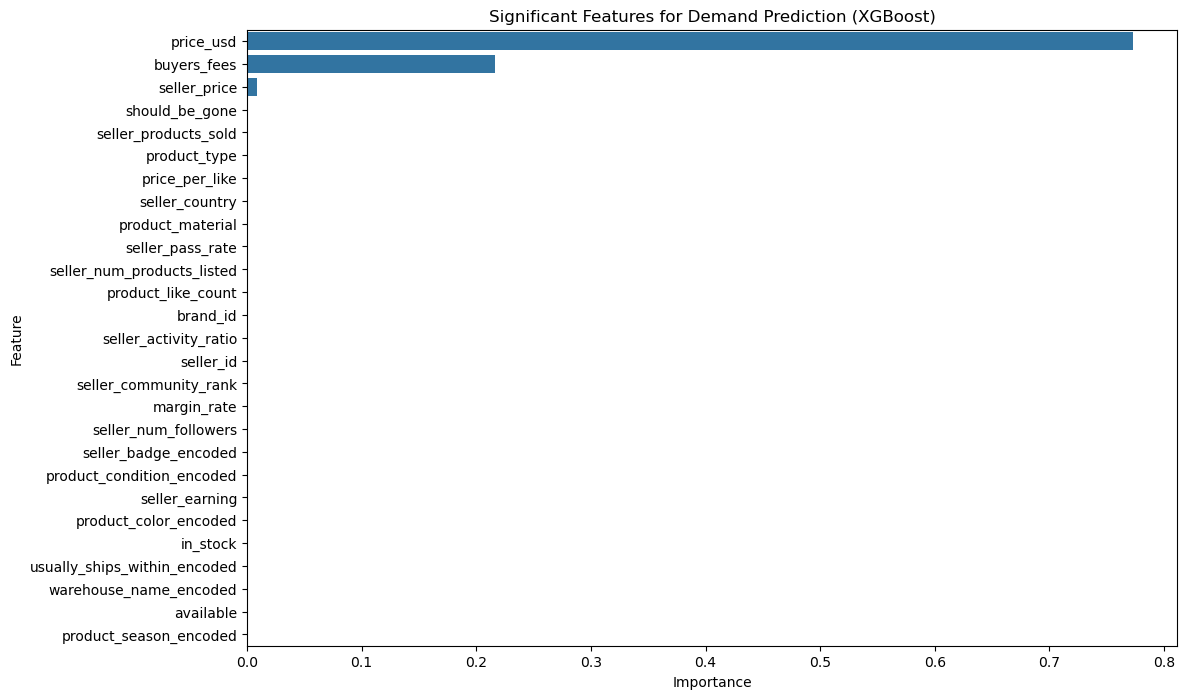

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor

# Drop unnecessary columns for modeling
excluded_cols = [ 'product_name', 'product_description', 'product_keywords', 'brand_name', 'brand_url', 'seller_username']

# Step 2: Create Interaction Features
df1['price_per_like'] = df1['price_usd'] / (df1['product_like_count'] + 1)
df1['seller_activity_ratio'] = df1['seller_products_sold'] / (df1['seller_num_products_listed'] + 1)

# Step 3: Feature Selection
X = df1.drop(columns=excluded_cols + ['sold'])
y = df1['sold']

# Step 4: Split Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit XGBoost Model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Step 6: Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
feature_importances = feature_importances[feature_importances['Importance'] > 0]
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Store predictors with importance > 0
predictors = feature_importances['Feature'].tolist()

# Display and plot features with importance > 0
print(feature_importances)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Significant Features for Demand Prediction (XGBoost)')
plt.show()


Even thought price_usd and buyers_fees was selected as significant in by XGB, when including in training it gave a perfect ROC-AUC score of 1, which was suspicious so I had to resort to removing those variables during training

27 features considered of some importance in an item getting sold

count     899281
unique         2
top        False
freq      885554
Name: sold, dtype: object
Missing values: 0


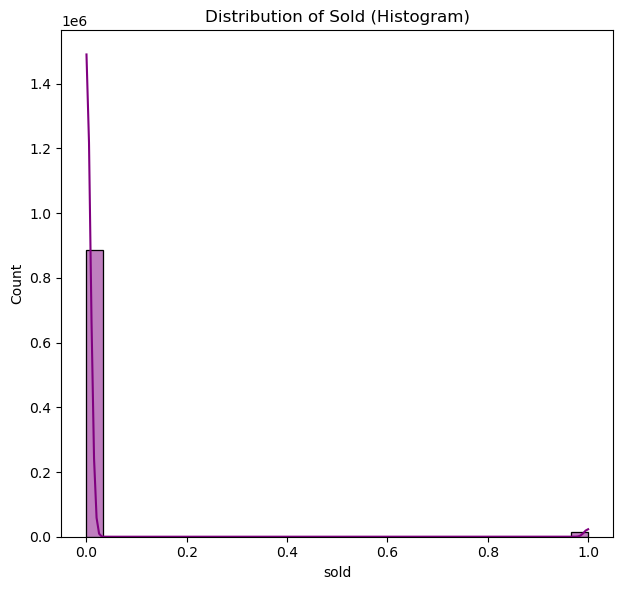

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df1['sold'].describe())

# Check for missing values
print(f"Missing values: {df1['sold'].isnull().sum()}")

# Plot the distribution of 'sold'
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df1['sold'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sold (Histogram)')


plt.tight_layout()
plt.show()


highly imbalanced class

In [14]:
# Create Derived Features
df1['price_to_earning_ratio'] = df1['price_usd'] / (df1['seller_earning'] + 1)  # Avoid division by zero
df1['price_per_like'] = df1['price_usd'] / (df1['product_like_count'] + 1)      # Avoid division by zero
df1['seller_activity_ratio'] = df1['seller_products_sold'] / (df1['seller_num_products_listed'] + 1)  # Avoid division by zero

# Check if features are added successfully
print(df1[['price_to_earning_ratio', 'price_per_like', 'seller_activity_ratio']].head())

   price_to_earning_ratio  price_per_like  seller_activity_ratio
0                1.252271        7.797714               0.200000
1                1.188837       63.900000               0.000000
2                1.377823      426.000000               0.828571
3                1.283980      163.900000               0.229091
4                1.415967       59.860000               1.266667


XGBOOST, LGBMBOOST CATBOOST predictive modelling without sampling techniques

In [15]:
#pip install catboost

In [16]:
pip install -U scikit-learn xgboost lightgbm catboost


Note: you may need to restart the kernel to use updated packages.


XGBClassifier ROC-AUC: 0.8761 | Time: 0.01 min
[LightGBM] [Info] Number of positive: 2883, number of negative: 185965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3327
[LightGBM] [Info] Number of data points in the train set: 188848, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015266 -> initscore=-4.166727
[LightGBM] [Info] Start training from score -4.166727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

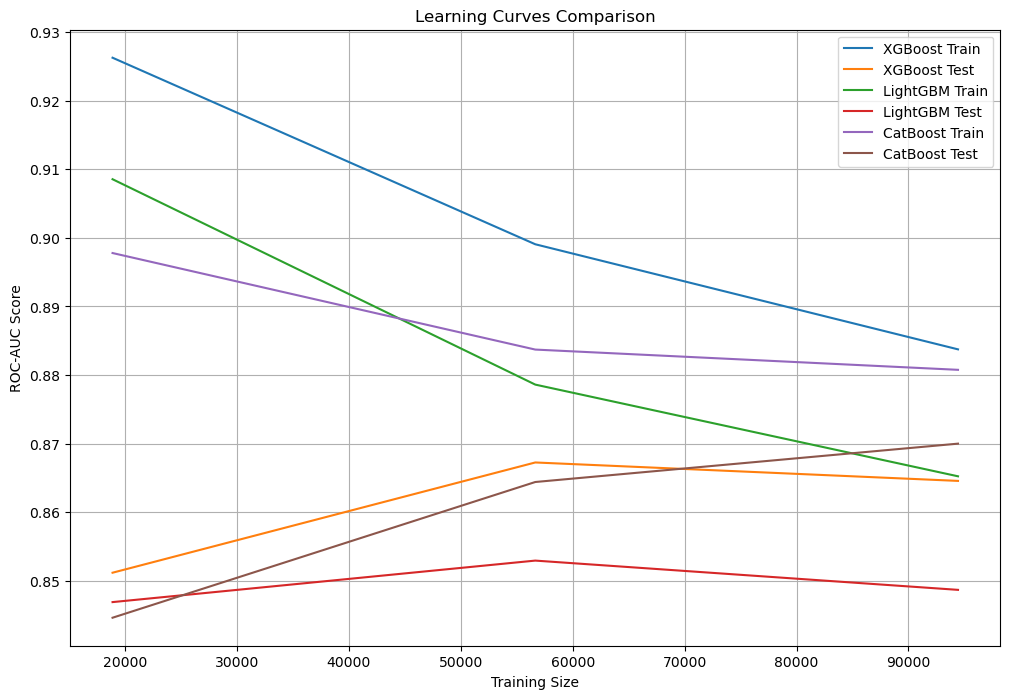

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import time

# Filter dataset to the most important features
important_features = [
    'seller_price', 'seller_badge_encoded', 'should_be_gone', 'seller_pass_rate',
    'price_to_earning_ratio', 'seller_products_sold', 'price_per_like', 'brand_id',
    'product_type', 'product_material', 'product_like_count', 'seller_num_products_listed',
    'seller_community_rank', 'seller_activity_ratio', 'product_color_encoded',
    'seller_num_followers', 'margin_rate', 'available', 'seller_country', 'in_stock',
    'product_season_encoded', 'usually_ships_within_encoded', 'product_condition_encoded',
    'warehouse_name_encoded'
]

# Assuming your DataFrame is named 'df'
X = df1[important_features]
y = df1['sold']

# Use a sample of the dataset for faster learning curves (30% of data)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.3, random_state=42, stratify=y)

# Split data into train and test sets (downsample training for faster execution)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)

# Function to train model and evaluate ROC-AUC
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model.__class__.__name__} ROC-AUC: {roc_auc:.4f} | Time: {elapsed_time:.2f} min")
    return model

# Initialize optimized models (reduced complexity, GPU if available)
xgb_model = xgb.XGBClassifier(
    eval_metric='auc', random_state=42,
    n_estimators=30, max_depth=3, tree_method='hist', n_jobs=-1
)

lgb_model = lgb.LGBMClassifier(
    random_state=42, n_estimators=30, max_depth=3, device='cpu'
)

cat_model = cb.CatBoostClassifier(
    verbose=0, random_state=42, iterations=30, depth=3, task_type='CPU'
)

# Train and evaluate models
xgb_model = train_and_evaluate(xgb_model, X_train, y_train, X_test, y_test)
lgb_model = train_and_evaluate(lgb_model, X_train, y_train, X_test, y_test)
cat_model = train_and_evaluate(cat_model, X_train, y_train, X_test, y_test)

# Function to plot faster learning curves
def plot_learning_curve(model, X, y, model_name):
    start_time = time.time()

    # Use a smaller sample and fewer splits for faster execution
    cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
        train_sizes=np.linspace(0.1, 0.5, 3)  # Fewer training sizes
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label=f"{model_name} Train")
    plt.plot(train_sizes, test_mean, label=f"{model_name} Test")

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model_name} Learning Curve completed in {elapsed_time:.2f} min")

plt.figure(figsize=(12, 8))

# Use the smaller sample for learning curves
plot_learning_curve(xgb_model, X_sample, y_sample, "XGBoost")
plot_learning_curve(lgb_model, X_sample, y_sample, "LightGBM")
plot_learning_curve(cat_model, X_sample, y_sample, "CatBoost")

plt.title("Learning Curves Comparison")
plt.xlabel("Training Size")
plt.ylabel("ROC-AUC Score")
plt.legend()
plt.grid()
plt.show()


XGBOOST, LGBMBOOST CATBOOST predictive modelling WITH SMOTETomek

FAST

/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Original class distribution:
sold
False    619887
True       9609
Name: count, dtype: int64
Resampled class distribution:
sold
False    617988
True     617988
Name: count, dtype: int64


/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier ROC-AUC: 0.8514 | Time: 0.05 min
[LightGBM] [Info] Number of positive: 617988, number of negative: 617988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3775
[LightGBM] [Info] Number of data points in the train set: 1235976, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:52:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:52:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packa

XGBoost Learning Curve completed in 0.42 min
[LightGBM] [Info] Number of positive: 43323, number of negative: 43195
[LightGBM] [Info] Number of positive: 43309, number of negative: 43209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3592
[LightGBM] [Info] Number of data points in the train set: 86518, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500740 -> initscore=0.002959
[LightGBM] [Info] Start training from score 0.002959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3587
[LightGBM] [Info] Number of data points in the train set: 86518, num

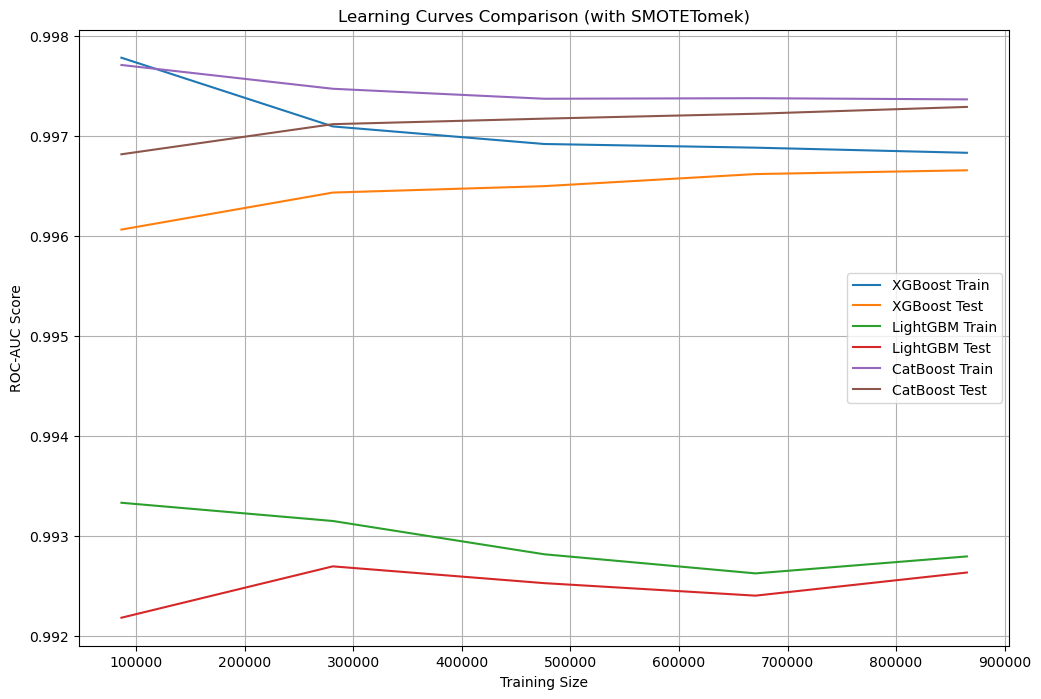

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import time
from imblearn.combine import SMOTETomek

# Filter dataset to the most important features
important_features = [
    'seller_price', 'seller_badge_encoded',
    'should_be_gone', 'seller_pass_rate', 'price_to_earning_ratio', 'seller_products_sold',
    'price_per_like', 'brand_id', 'product_type', 'product_material',
    'product_like_count', 'seller_num_products_listed', 'seller_community_rank',
    'seller_activity_ratio', 'product_color_encoded', 'seller_num_followers', 'margin_rate',
    'available', 'seller_country', 'in_stock', 'product_season_encoded',
    'usually_ships_within_encoded', 'product_condition_encoded', 'warehouse_name_encoded'
]

X = df1[important_features]
y = df1['sold']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTETomek to handle class imbalance
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print("Original class distribution:")
print(pd.Series(y_train).value_counts())
print("Resampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Function to train model and evaluate ROC-AUC
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model.__class__.__name__} ROC-AUC: {roc_auc:.4f} | Time: {elapsed_time:.2f} min")
    return model

# Initialize optimized models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42,
                              n_estimators=100, max_depth=5, n_jobs=-1)
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, max_depth=5, n_jobs=-1)
cat_model = cb.CatBoostClassifier(verbose=0, random_state=42, iterations=100, depth=5)

# Train and evaluate with resampled data
xgb_model = train_and_evaluate(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
lgb_model = train_and_evaluate(lgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
cat_model = train_and_evaluate(cat_model, X_train_resampled, y_train_resampled, X_test, y_test)

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name):
    start_time = time.time()

    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)  # Reduced for faster execution
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label=f"{model_name} Train")
    plt.plot(train_sizes, test_mean, label=f"{model_name} Test")

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model_name} Learning Curve completed in {elapsed_time:.2f} min")

plt.figure(figsize=(12, 8))
plot_learning_curve(xgb_model, X_train_resampled, y_train_resampled, "XGBoost")
plot_learning_curve(lgb_model, X_train_resampled, y_train_resampled, "LightGBM")
plot_learning_curve(cat_model, X_train_resampled, y_train_resampled, "CatBoost")

plt.title("Learning Curves Comparison (with SMOTETomek)")
plt.xlabel("Training Size")
plt.ylabel("ROC-AUC Score")
plt.legend()
plt.grid()
plt.show()


training without seller_price to see if accuracy can go down to prevent overfitting

/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Original class distribution:
sold
False    619887
True       9609
Name: count, dtype: int64
Resampled class distribution:
sold
False    617329
True     617329
Name: count, dtype: int64


/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:14:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier ROC-AUC: 0.8459 | Time: 0.04 min
[LightGBM] [Info] Number of positive: 617329, number of negative: 617329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3521
[LightGBM] [Info] Number of data points in the train set: 1234658, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:15:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:15:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:15:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:15:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.10/site-packa

XGBoost Learning Curve completed in 0.38 min
[LightGBM] [Info] Number of positive: 43168, number of negative: 43258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3333
[LightGBM] [Info] Number of data points in the train set: 86426, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499479 -> initscore=-0.002083
[LightGBM] [Info] Start training from score -0.002083
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 43304, number of negative: 43122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train se

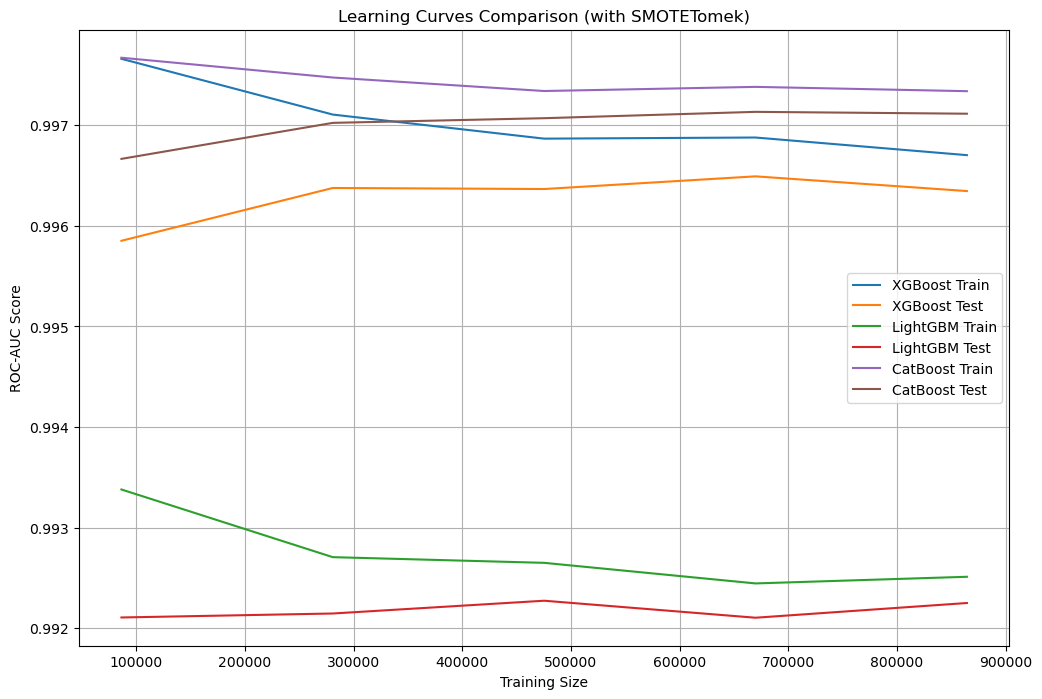

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import time
from imblearn.combine import SMOTETomek

# Filter dataset to the most important features
important_features = [
    'seller_badge_encoded',
    'should_be_gone', 'seller_pass_rate', 'price_to_earning_ratio', 'seller_products_sold',
    'price_per_like', 'brand_id', 'product_type', 'product_material',
    'product_like_count', 'seller_num_products_listed', 'seller_community_rank',
    'seller_activity_ratio', 'product_color_encoded', 'seller_num_followers', 'margin_rate',
    'available', 'seller_country', 'in_stock', 'product_season_encoded',
    'usually_ships_within_encoded', 'product_condition_encoded', 'warehouse_name_encoded'
]

X = df1[important_features]
y = df1['sold']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTETomek to handle class imbalance
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print("Original class distribution:")
print(pd.Series(y_train).value_counts())
print("Resampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Function to train model and evaluate ROC-AUC
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model.__class__.__name__} ROC-AUC: {roc_auc:.4f} | Time: {elapsed_time:.2f} min")
    return model

# Initialize optimized models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42,
                              n_estimators=100, max_depth=5, n_jobs=-1)
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, max_depth=5, n_jobs=-1)
cat_model = cb.CatBoostClassifier(verbose=0, random_state=42, iterations=100, depth=5)

# Train and evaluate with resampled data
xgb_model = train_and_evaluate(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
lgb_model = train_and_evaluate(lgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
cat_model = train_and_evaluate(cat_model, X_train_resampled, y_train_resampled, X_test, y_test)

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name):
    start_time = time.time()

    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)  # Reduced for faster execution
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label=f"{model_name} Train")
    plt.plot(train_sizes, test_mean, label=f"{model_name} Test")

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model_name} Learning Curve completed in {elapsed_time:.2f} min")

plt.figure(figsize=(12, 8))
plot_learning_curve(xgb_model, X_train_resampled, y_train_resampled, "XGBoost")
plot_learning_curve(lgb_model, X_train_resampled, y_train_resampled, "LightGBM")
plot_learning_curve(cat_model, X_train_resampled, y_train_resampled, "CatBoost")

plt.title("Learning Curves Comparison (with SMOTETomek)")
plt.xlabel("Training Size")
plt.ylabel("ROC-AUC Score")
plt.legend()
plt.grid()
plt.show()


The difference is still low, still exhibiting very high accuracy of almost 0.998 in learning curve

In [32]:
print(X_train.corrwith(y_train))


product_type             -0.010252
seller_pass_rate          0.008200
price_per_like           -0.029253
price_to_earning_ratio    0.005652
seller_activity_ratio     0.071064
dtype: float64


This confirms that the features itself are not the cause, hence no data leakage, most possible explanation is that the models used here (xgboost, catboost, lgbm) are memorizing the data too well.



CAUSAL ANALYSIS

Price Elasticity with DoubleML

In [21]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from doubleml import DoubleMLData, DoubleMLPLR

# Step 1: Prepare Data
excluded_cols = ['product_id', 'product_name', 'product_description', 'product_keywords', 'brand_name', 'brand_url', 'seller_username']

#df1.dropna(subset=['sold', 'price_usd'], inplace=True)  # Ensure no missing Y or T



# Define Outcome (Y), Treatment (T), and Controls (X)
Y = 'sold'
T = 'price_usd'
X = ['product_type', 'product_category', 'product_season', 'product_condition',
     'seller_badge', 'has_cross_border_fees', 'seller_pass_rate',
     'price_per_like', 'price_to_earning_ratio', 'seller_activity_ratio']



# Ensure Data Consistency
X = [col for col in X if col in df1.columns]

# Step 2: Set Up DoubleML Data
data = DoubleMLData(df1, y_col=Y, d_cols=T, x_cols=X)

# Step 3: DoubleML Model (Partial Linear Regression with XGBoost)
ml_l = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)
ml_m = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)

model = DoubleMLPLR(data, ml_l, ml_m)
model.fit()

# Step 4: Evaluate Results
print("Estimated Price Elasticity:", model.coef)
print("Standard Errors:", model.se)

# Step 5: Interpret the Results
# If the coefficient is negative, increasing price reduces demand
if model.coef < 0:
    print("Demand decreases as price increases (Elastic).")
else:
    print("Demand increases with price (Inelastic).")


/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Estimated Price Elasticity: [1.71904028e-07]
Standard Errors: [6.22928769e-08]
Demand increases with price (Inelastic).


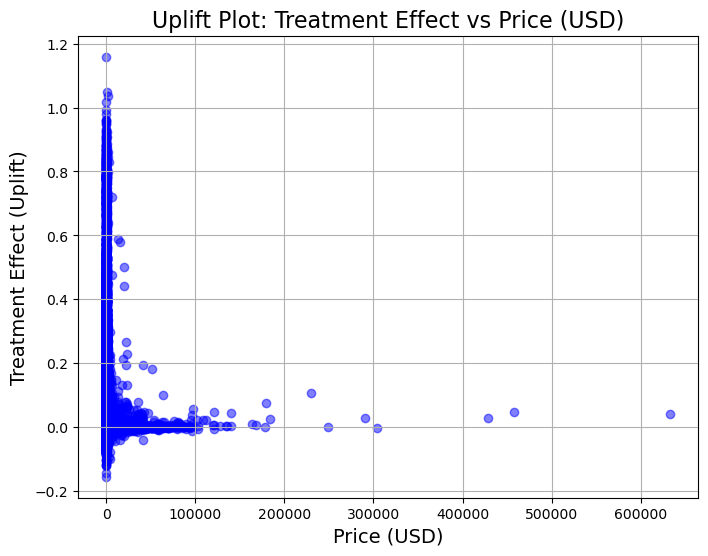

In [22]:
import matplotlib.pyplot as plt

# Step 6: Calculate Treatment Effects (Uplift)
treatment_effects = model.predictions["ml_l"]  # or model.predictions["ml_m"]



# Step 7: Plot Uplift (Treatment Effect vs Price)
plt.figure(figsize=(8, 6))

# Scatter plot of treatment effects vs price_usd
plt.scatter(df1[T], treatment_effects, color='b', alpha=0.5)

# Plot formatting
plt.title('Uplift Plot: Treatment Effect vs Price (USD)', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Treatment Effect (Uplift)', fontsize=14)
plt.grid(True)

# Show plot
plt.show()


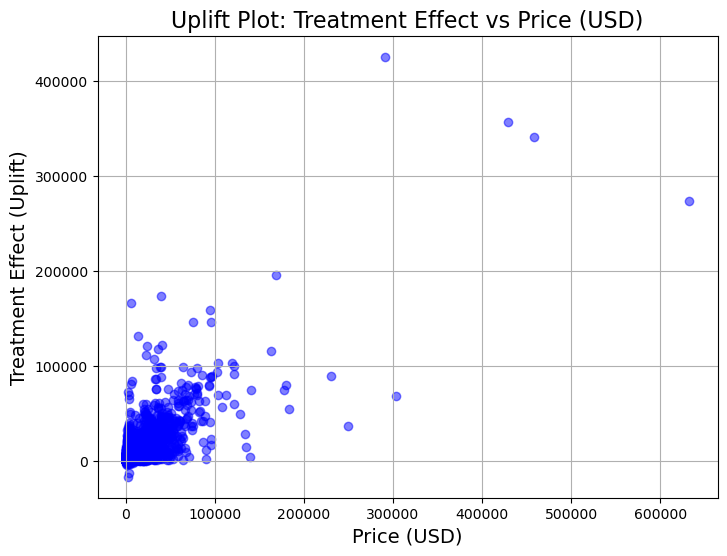

In [23]:
import matplotlib.pyplot as plt

# Step 6: Calculate Treatment Effects (Uplift)
treatment_effects = model.predictions["ml_m"]  



# Step 7: Plot Uplift (Treatment Effect vs Price)
plt.figure(figsize=(8, 6))

# Scatter plot of treatment effects vs price_usd
plt.scatter(df1[T], treatment_effects, color='b', alpha=0.5)

# Plot formatting
plt.title('Uplift Plot: Treatment Effect vs Price (USD)', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Treatment Effect (Uplift)', fontsize=14)
plt.grid(True)

# Show plot
plt.show()


In [24]:
#pip install scikit-uplift


In [29]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from doubleml import DoubleMLData, DoubleMLPLR

# Step 1: Prepare Data
excluded_cols = ['product_id', 'product_name', 'product_description', 'product_keywords', 'brand_name', 'brand_url', 'seller_username']

#df1.dropna(subset=['sold', 'price_usd'], inplace=True)  # Ensure no missing Y or T



# Define Outcome (Y), Treatment (T), and Controls (X)
Y = 'sold'
T = 'seller_price'
X = ['product_type', 'product_category', 'product_season', 'product_condition',
     'seller_badge', 'has_cross_border_fees', 'seller_pass_rate',
     'price_per_like', 'price_to_earning_ratio', 'seller_activity_ratio']



# Ensure Data Consistency
X = [col for col in X if col in df1.columns]

# Step 2: Set Up DoubleML Data
data = DoubleMLData(df1, y_col=Y, d_cols=T, x_cols=X)

# Step 3: DoubleML Model (Partial Linear Regression with XGBoost)
ml_l2 = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)
ml_m2 = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)

model = DoubleMLPLR(data, ml_l2, ml_m2)
model.fit()

# Step 4: Evaluate Results
print("Estimated Price Elasticity:", model.coef)
print("Standard Errors:", model.se)

# Step 5: Interpret the Results
# If the coefficient is negative, increasing price reduces demand
if model.coef < 0:
    print("Demand decreases as price increases (Elastic).")
else:
    print("Demand increases with price (Inelastic).")


/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Estimated Price Elasticity: [1.9528288e-07]
Standard Errors: [7.07704828e-08]
Demand increases with price (Inelastic).


Futher validation with other causal models

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklift.models import TwoModels
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Step 1: Data Preparation
df1.dropna(subset=['sold', 'price_usd'], inplace=True)

# Convert 'sold' (Y) to binary classification
df1['sold'] = (df1['sold'] > 0).astype(int)

# Bin the price into categories (Treatment Groups)
df1['price_category'] = pd.qcut(df1['price_usd'], q=3, labels=[0, 1, 2])

# Convert price category into binary treatment
df1['price_binary'] = (df1['price_category'] > 1).astype(int)  # 1 = High Price, 0 = Low/Medium Price
T = 'price_binary'  # Update Treatment Variable

# Define features
X = ['product_type', 'product_category', 'product_season', 'product_condition',
     'seller_badge', 'has_cross_border_fees', 'seller_pass_rate',
     'price_per_like', 'price_to_earning_ratio', 'seller_activity_ratio']
X = [col for col in X if col in df1.columns]

# Convert categorical variables to numeric
df1[X] = df1[X].apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Define Y (Outcome) and T (Binary Treatment)
Y = 'sold'

# Train-Test Split
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(df1[X], df1[Y], df1[T], test_size=0.2, random_state=42)

# Step 2: Train Uplift Model (Two-Model Approach)
treatment_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Model for treated group
control_model = RandomForestClassifier(n_estimators=100, random_state=42)    # Model for control group

uplift_model = TwoModels(
    estimator_trmnt=treatment_model,  # Corrected parameter name
    estimator_ctrl=control_model,     # Corrected parameter name
    method='vanilla'  # Basic two-model approach
)

uplift_model.fit(X_train, treatment=T_train, y=y_train)

# Step 3: Evaluate Uplift
uplift_preds = uplift_model.predict(X_test)
auc_score = roc_auc_score(y_test, uplift_preds)
print(f"ROC AUC Score: {auc_score}")

# Step 4: Interpretation
uplift_effect = uplift_preds.mean()
print(f"Average Uplift Effect: {uplift_effect}")

if uplift_effect < 0:
    print("Demand decreases as price increases (Elastic).")
else:
    print("Demand increases with price (Inelastic).")


ROC AUC Score: 0.5725194046053108
Average Uplift Effect: 0.07955135946833672
Demand increases with price (Inelastic).


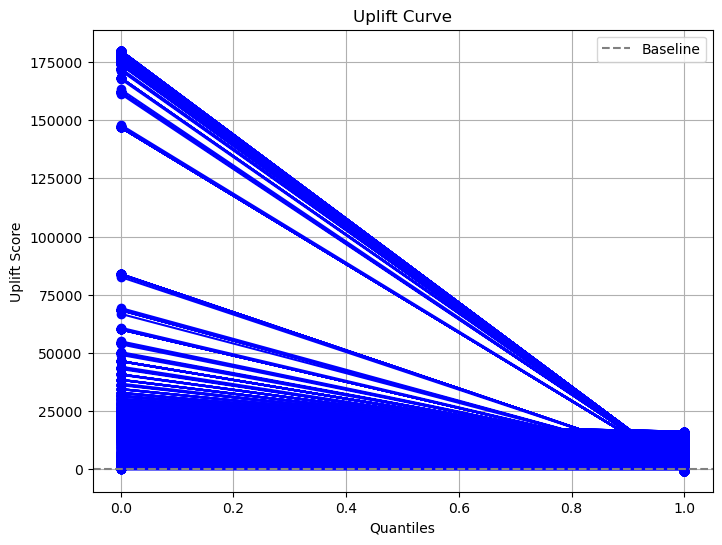

In [30]:
import matplotlib.pyplot as plt
from sklift.metrics import uplift_curve

# Compute uplift curve
uplift_values = uplift_curve(y_test, uplift_preds, T_test)

# Plot uplift curve
plt.figure(figsize=(8, 6))
plt.plot(uplift_values, marker='o', linestyle='-', color='blue')
plt.axhline(y=0, color='gray', linestyle='--', label="Baseline")
plt.xlabel("Quantiles")
plt.title("Uplift Curve")
plt.ylabel("Uplift Score")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Luxury or Prestige Effect: Customers might view higher prices as a sign of better quality.


In [ ]:
df1['brand_encoded'] = df1.groupby('brand_id')['price_usd'].transform('mean')

In [ ]:

# Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from doubleml import DoubleMLData, DoubleMLPLR

# Step 1: Prepare Data
excluded_cols = ['product_id', 'product_name', 'product_description', 'product_keywords', 'brand_name', 'brand_url', 'seller_username']

#df1.dropna(subset=['sold', 'price_usd'], inplace=True)  # Ensure no missing Y or T



# Define Outcome (Y), Treatment (T), and Controls (X)
Y = 'sold'
T = 'brand_encoded'
X = ['product_type', 'product_category', 'product_season', 'product_condition',
     'seller_badge', 'has_cross_border_fees', 'seller_pass_rate',
     'price_per_like', 'price_to_earning_ratio', 'seller_activity_ratio']



# Ensure Data Consistency
X = [col for col in X if col in df1.columns]

# Step 2: Set Up DoubleML Data
data = DoubleMLData(df1, y_col=Y, d_cols=T, x_cols=X)

# Step 3: DoubleML Model (Partial Linear Regression with XGBoost)
ml_l = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)
ml_m = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)

model = DoubleMLPLR(data, ml_l, ml_m)
model.fit()

# Step 4: Evaluate Results
print("Estimated Price Elasticity:", model.coef)
print("Standard Errors:", model.se)

# Step 5: Interpret the Results (based on brand type)
# If the coefficient is positive, increasing the brand_id leads to an increase in demand (higher sales)
if model.coef < 0:
    print("Demand decreases with the brand type (negative effect).")
else:
    print("Demand increases with the brand type (positive effect).")

Estimated Price Elasticity: [1.44598855e-06]
Standard Errors: [1.4280145e-07]
Demand increases with the brand type (positive effect).


As the mean price of a brand increases by $1 USD, the probability of a product being sold increases by approximately 0.00000145 units.
This is an extremely weak positive effect, suggesting that brand prestige (higher brand average price) has a tiny, positive impact on product sales.
Products from more expensive brands (with higher mean prices) have a slightly higher chance of being sold. This may reflect perceived quality or brand equity. Since it is a small effect, it is essential to market differently to the high spending users of Vestiare vs the low to drive revenue.

**NOTE:**

In the presentation, it is specified that seller_price had an elastic effect on demand when this code was executed previously, but now after several iterations I have confirmed that it is actually *inelastic*.

In conclusion, both seller_price and price_usd have an **inelastic effect** on demand.